<h1><b> NAIVE BAYES

#<ul><b> LOADING THE DATASET

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/10_feature_extraction.csv")
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
0,1,0,1,1,0,202500.0,406597.5,24700.5,6,3,...,0.139376,1,0,0,0.0,0.0,0.0,0.0,1.0,8
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1,2,...,0.586819,1,0,0,0.0,0.0,0.0,0.0,0.0,3
2,0,1,1,1,0,67500.0,135000.0,6750.0,6,3,...,0.729567,0,0,0,0.0,0.0,0.0,0.0,0.0,8
3,0,0,0,1,0,135000.0,312682.5,29686.5,6,3,...,0.519243,1,0,0,0.0,0.0,0.0,0.0,0.5,8
4,0,0,1,1,0,121500.0,513000.0,21865.5,6,3,...,0.581112,0,0,1,0.0,0.0,0.0,0.0,0.0,3


# <b> GAUSSIAN NAIVE DISTRIBUTION

* Scaling: Typically not required for Gaussian Naive Bayes due to its assumption of normal distribution within each class.
* Multicollinearity: While multicollinearity may impact other algorithms, Naive Bayes is less affected because it assumes independence among features.

* Normal Distribution (Gaussian): The algorithm assumes that the features within each class follow a Gaussian (normal) distribution. Checking the distribution of your features, especially if they deviate significantly from normality, can be helpful.

* Homoscedasticity: The algorithm assumes that the variance of each feature is the same across different classes. Checking for homoscedasticity (equal variance) can be important, especially if certain features have significantly different variances in different classes.

* Missing Values: Naive Bayes assumes that missing values are missing completely at random. If your dataset has missing values, it's essential to handle them appropriately or assess whether they follow a random pattern.

* Outliers: Outliers can affect the mean and standard deviation calculations in Gaussian Naive Bayes. Checking for and handling outliers may be necessary.

* Class Priors: Naive Bayes assumes that the prior probabilities of different classes are known. If you have imbalanced classes, it's important to consider how the algorithm might be influenced by the prior probabilities and whether adjustments are needed

In [3]:
X=df.drop("TARGET",axis=1)
y=df["TARGET"]

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
# Combine features and target variables for the training set
test_data = pd.concat([X_test, y_test], axis=1)
train_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)
combined_data = pd.concat([train_data, test_data], axis=0)

In [18]:
combined_data.to_csv('/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/11_SMOTEENED_DATA.csv', index=False)

In [27]:
combined_data["TARGET"].value_counts()

0    279416
1     72009
Name: TARGET, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix


In [40]:
nb_classifier = GaussianNB(var_smoothing=0.7e-8)
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55850
           1       0.00      0.00      0.00      4940

    accuracy                           0.92     60790
   macro avg       0.46      0.50      0.48     60790
weighted avg       0.84      0.92      0.88     60790



In [32]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[55850,     0],
       [ 4940,     0]])

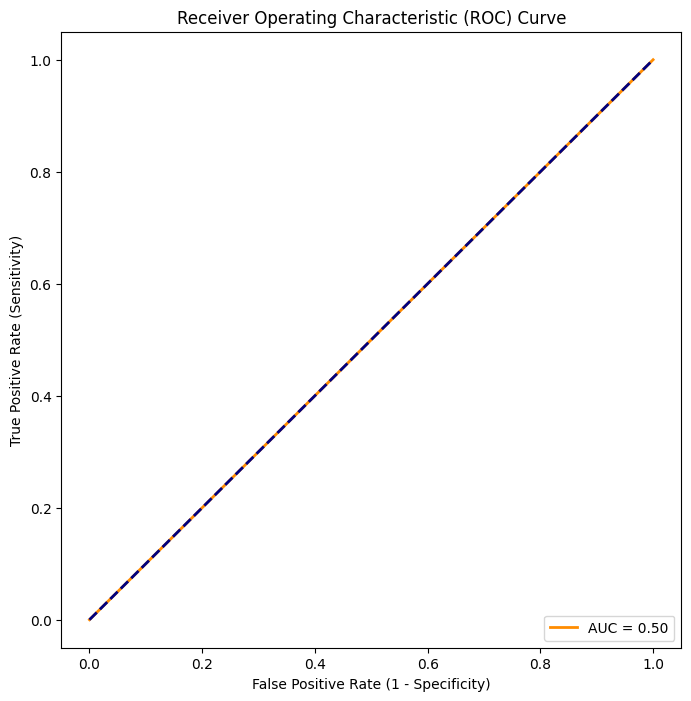

In [42]:
# for test set

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()